# **Load The Dataset**

In [1]:
! pip install tensorflow==2.0.0-beta1


ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 178, in main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 352, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/resolve.py", line 131, in resolve
    self._resolve_one(requirement_set, req)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/resolve.py", line 294, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/resolve.py", line 242, in _get_abstract_dist_for
    self.require_hashes
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/operations/prepare.py", line 347, in prepare_linked_requirement
    progress_bar=self.progress_bar
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/download.py"

KeyboardInterrupt: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import glob
import numpy as np
import random
import librosa
import librosa.display as dp
import tensorflow as tf
from tensorflow import keras
import os
from sklearn.preprocessing import LabelEncoder
import librosa.display
import pathlib
# from pytorchtools import EarlyStopping
import matplotlib.pyplot as plt
import IPython.display as ipd
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [4]:
%cd drive/My Drive/Zuliat

/content/drive/My Drive/Zuliat


In [0]:
!unzip /content/drive/My\ Drive/Zuliat/Animal\ Edited1.zip -d /content/drive/My\ Drive/Zuliat

unzip:  cannot find or open /content/drive/My Drive/Zuliat/Animal Edited1.zip, /content/drive/My Drive/Zuliat/Animal Edited1.zip.zip or /content/drive/My Drive/Zuliat/Animal Edited1.zip.ZIP.


In [0]:
!ls /content/drive/My\ Drive/Zuliat/Animal\ Edited1/Bird\ –\ ẹyẹ

 106.wav    20.wav   44.wav	       b.wav		'f (copy 2).wav'
 1106.wav   21.wav   49.wav	      'c (copy 1).wav'	 f.wav
 1128.wav   22.wav   50.wav	      'c (copy 2).wav'	'g (copy 1).wav'
 121.wav    23.wav   51.wav	       c.wav		'g (copy 2).wav'
 122.wav    24.wav   68.wav	      'd (copy 1).wav'	 g.wav
 123.wav    25.wav   90.wav	      'd (copy 2).wav'	'h (copy 1).wav'
 126.wav    26.wav  'a (copy 1).wav'   d.wav		'h (copy 2).wav'
 127.wav    27.wav  'a (copy 2).wav'  'e (copy 1).wav'	 h.wav
 150.wav    28.wav   a.wav	      'e (copy 2).wav'
 151.wav    2.wav   'b (copy 1).wav'   e.wav
 1.wav	    37.wav  'b (copy 2).wav'  'f (copy 1).wav'


In [0]:
bird_dir = '/content/drive/My Drive/Zuliat/Animal Edited1/Bird – ẹyẹ/'
bird_list = [bird_dir + '106.wav',bird_dir + '21.wav',bird_dir + '126.wav']

In [0]:
f = '/content/drive/My Drive/Zuliat/Animal Edited1/Bird – ẹyẹ/126.wav'

In [0]:
e = []
wave = wav2mfcc(f)
e.append(wave)
e = np.array(e)

In [35]:
e.shape

(1, 40, 1500)

In [0]:
for i in bird_list:
  print(i)

/content/drive/My Drive/Zuliat/Animal Edited1/Bird – ẹyẹ/106.wav
/content/drive/My Drive/Zuliat/Animal Edited1/Bird – ẹyẹ/21.wav
/content/drive/My Drive/Zuliat/Animal Edited1/Bird – ẹyẹ/126.wav


# **MFCC Audio Sample Graph**

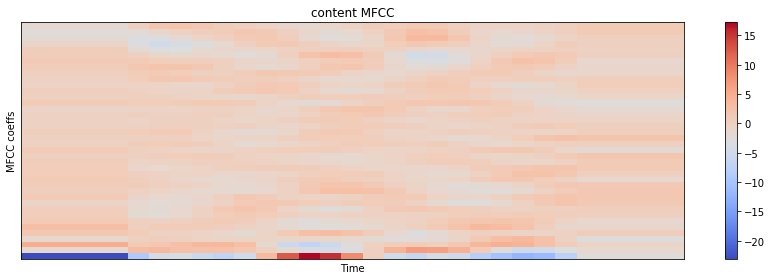

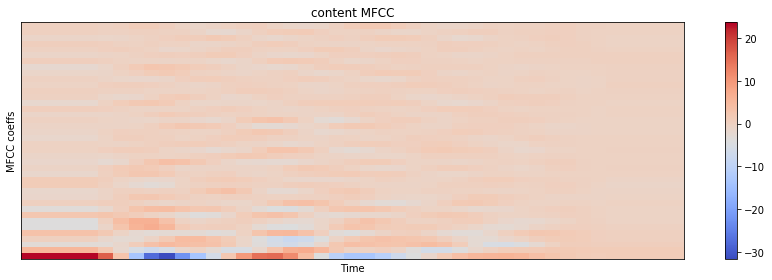

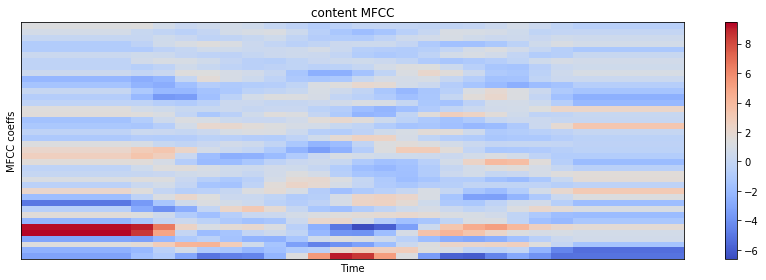

In [0]:
def plot_mfcc(file):
  for fn in file:
    lab = str(fn)
    fns,sr = librosa.load(lab)
    mfcc = librosa.feature.mfcc(fns, n_mfcc = 40)
    delta2_mfcc = librosa.feature.delta(mfcc,order = 2)
    label = lab.split('/')[1]
    plt.figure(figsize=(12, 4))
    dp.specshow(delta2_mfcc)
    plt.ylabel('MFCC coeffs')
    plt.xlabel('Time')
    plt.title(label+' MFCC')
    plt.colorbar()
    plt.tight_layout()
    
plot_mfcc(bird_list)

# **Audio Sample Graph**

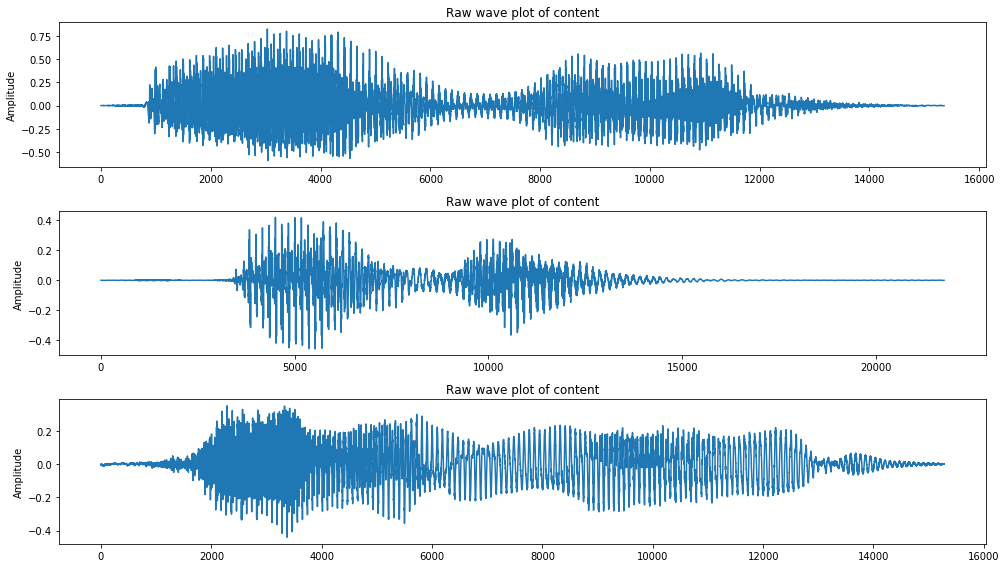

In [0]:
def plot_audio_signal(file):
    fig = plt.figure(figsize=(14, 8))
    for i, fn in enumerate(file):
        wav,sr= librosa.load(fn)
        lab=str(fn)
        label=lab.split('/')[1]
        ax = fig.add_subplot(3,1,i+1)
        ax.set_title('Raw wave plot of ' + label)
        ax.set_ylabel('Amplitude')
        ax.plot(wav)
    fig.tight_layout()

    
plot_audio_signal(bird_list)

In [0]:

wave, sr = librosa.load(str(bird_list[0]), mono=True)
lab=str(bird_list[0])
label=lab.split('/')[1]
print(label  + " audio sample")
ipd.Audio(data=wave,rate=sr)


content audio sample


In [0]:
wave, sr = librosa.load(str(bird_list[1]), mono=True)
lab=str(bird_list[1])
label=lab.split('/')[1]
print(str(sr)  + " audio sample")
ipd.Audio(data=wave,rate=20000)

22050 audio sample


In [0]:
wave, sr = librosa.load(str(bird_list[2]), mono=True)
lab=str(bird_list[2])
label=lab.split('/')[1]
print(str(sr) + " audio sample")
ipd.Audio(data=wave,rate=20000)

22050 audio sample


# **Convert Audio Into MFCC**

In [0]:
wav2spec

In [0]:
def wav2mfcc(file_path,max_length=1500):
  wave,sr = librosa.load(file_path,mono = True, sr = 20000)
  mfcc = librosa.feature.mfcc(wave,sr = sr, n_mfcc = 40)
  mfcc = np.pad(mfcc, ((0,0), (0, max_length-len(mfcc[0]))), mode='constant', constant_values=0)
  return mfcc

In [0]:
def wav2img(file_path,max_length = 1500):
  for i, fn in enumerate(file):
        wav,sr= librosa.load(fn)
        lab=str(fn)
        label=lab.split('/')[1]

# **Split dataset into training and test**

In [0]:
X_b,y_b = [],[]

def train_set_split():
  data_root = pathlib.Path('/content/drive/My Drive/Zuliat/Animal Edited1')
  all_audio_path = list(data_root.glob('*/*'))
  for wav in all_audio_path:
    wave = wav2mfcc(wav)
    label = str(wav)
    X_b.append(wave)
    y_b.append(label.split('/')[-2])

In [0]:
train_set_split()

In [0]:
final = set(y_b)

In [0]:
import json
json.dumps(final)

'["Grasscutter \\u2013 o\\u0323\\u0300ya\\u0300", "Bee \\u2013 oyin", "Cockroach \\u2013 aa\\u0301ya\\u0301n", "Cow \\u2013 ma\\u0300a\\u0301lu\\u0300", "Pig \\u2013 e\\u0323le\\u0323\\u0301de\\u0323\\u0300", "Hamster \\u2013 asi\\u0301n", "Rat \\u2013 eku", "Zebra \\u2013 egbin", "Tortoise \\u2013 i\\u0300ja\\u0300pa\\u0301", "Hawk - a\\u0300s\\u0323a\\u0301", "Sheep \\u2013 a\\u0300gu\\u0300nta\\u0300n", "Fish \\u2013 e\\u0323ja", "Gorilla \\u2013 i\\u0300na\\u0300ki\\u0301", "Buffalo \\u2013 e\\u0323fo\\u0323\\u0300n", "Crocodile \\u2013 o\\u0323\\u0300ni\\u0300", "Snake \\u2013 ejo\\u0300", "Rabbit \\u2013 ehoro", "Horse \\u2013 e\\u0323s\\u0323in", "Turkey \\u2013 to\\u0300lo\\u0301to\\u0300lo\\u0301", "Spider \\u2013 ala\\u0301n\\u0300taku\\u0300n", "Eagle \\u2013 idi\\u0300", "Dog \\u2013 aja\\u0301", "Lion \\u2013 ki\\u0300ni\\u0300u\\u0301n", "Cat \\u2013 olo\\u0301u\\u0301ngbo\\u0300", "Lizard \\u2013 ala\\u0301n\\u0300gba\\u0301", "Aligator \\u2013 e\\u0323le\\u0323\\u0301e\

In [0]:
import timeit
start_time = timeit.default_timer()
train_set_split()
elapsed = timeit.default_timer() - start_time
print(elapsed)

849.3438680830004


In [0]:
X = np.array(X)

In [0]:
X.shape

(1996, 40, 1500)

In [0]:
np.save('X',X)

In [0]:
lb = LabelEncoder()
y_t = lb.fit_transform(y)

In [0]:
y_t = keras.utils.to_categorical(y_t)

In [0]:
y_t.shape

(1996, 50)

In [0]:
np.save('y',y)

# **Model Building**

In [0]:
X = np.load('X.npy')
y = np.load('y.npy')

In [0]:
lb = LabelEncoder()
y_t = lb.fit_transform(y)
y_t = keras.utils.to_categorical(y_t)

In [0]:
y_out = y_t.shape[1]

In [0]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y_t,test_size = 0.2)

In [0]:
callbacks = [ModelCheckpoint('training_{epoch:02d}.pb', save_best_only=True)]

In [0]:
model = keras.Sequential([keras.layers.LSTM(250,input_shape = (40,1500),return_sequences = True),
                          
                          keras.layers.LSTM(125,return_sequences = True),
                          keras.layers.LSTM(78,return_sequences = True),
                          keras.layers.BatchNormalization(),
                          
                          keras.layers.LSTM(40,return_sequences = True),
                          keras.layers.LSTM(25,return_sequences = True),
                          keras.layers.BatchNormalization(),
                          
                          keras.layers.LSTM(18,return_sequences = True),
                          keras.layers.Conv1D(15,activation = tf.nn.relu,kernel_size = 3, padding = 'same'),
                          keras.layers.MaxPool1D(pool_size = 2),
                          keras.layers.BatchNormalization(),
                          
                          #keras.layers.Flatten(),
                          keras.layers.Dense(60,activation = tf.nn.relu),
                          keras.layers.Dense(y_out,activation = tf.nn.softmax)
                         ])

In [14]:
model.summary()

ValueError: ignored

In [11]:
import os
import tensorflow as tf
# This address identifies the TPU we'll use when configuring TensorFlow.
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
#tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

AttributeError: ignored

In [22]:
tpu_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6_input (InputLayer)    [(None, 40, 1500)]        0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 40, 250)           1751000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 40, 125)           188000    
_________________________________________________________________
lstm_8 (LSTM)                (None, 40, 78)            63648     
_________________________________________________________________
batch_normalization_3 (Batch (None, 40, 78)            312       
_________________________________________________________________
lstm_9 (LSTM)                (None, 40, 40)            19040     
_________________________________________________________________
lstm_10 (LSTM)               (None, 40, 25)           

In [23]:
tpu_model.compile(optimizer = tf.train.AdamOptimizer(learning_rate = 0.002),loss = tf.keras.losses.CategoricalCrossentropy(),metrics = ['accuracy'])

history = tpu_model.fit(X_train,y_train,epochs = 200,batch_size = 32 * 8,validation_split = 0.2,callbacks = callbacks)

Train on 1276 samples, validate on 320 samples


AttributeError: ignored

In [0]:
tpu_model.evaluate(X_test,y_test)

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

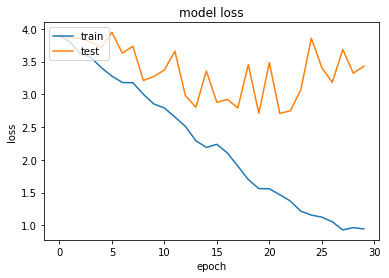

In [0]:
# summarize history for loss
plt.plot(history.history['loss'][:30])
plt.plot(history.history['val_loss'][:30])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict_classes(X_test)

array([ 8, 16,  7,  2, 17, 12, 38, 40,  3,  9, 29, 33, 36,  4, 34,  4, 18,
       29, 15, 40, 35, 38, 26, 25, 10, 33,  5,  1, 35, 40,  8, 40, 19, 48,
       27, 45, 14,  6, 48, 20,  0, 45,  1,  1, 44,  0,  0,  5, 21, 19, 48,
       31, 36,  0,  4, 13, 34,  2, 48, 32, 35, 33, 32, 29, 41, 18, 46,  1,
       12, 25, 47, 43, 18,  6, 43,  5, 39,  8,  0, 27, 28, 18, 49, 48,  8,
       34,  2, 49,  2, 28, 36, 26, 22,  5, 29, 12, 48, 38, 18, 39, 31,  2,
        5, 37, 44, 23, 19, 47, 13, 33, 36, 45, 18,  1, 47, 40, 32,  1, 39,
       12,  1, 40, 11, 49, 35,  1, 17, 28,  2, 21, 48,  5,  2,  0,  8,  2,
       12,  1, 14, 46, 16, 25,  0,  2,  7, 12, 41,  4, 44,  9,  0, 13, 31,
       35, 28, 44, 12,  1, 10, 33, 42,  4,  2,  6,  5, 24, 24, 12,  1,  1,
       47, 31, 31, 16, 46, 13, 35,  0,  2, 34, 47, 34,  1,  1, 35, 49,  6,
       21, 17,  0, 17,  1, 38, 34, 43, 44, 11, 44,  1,  2, 35,  1,  5, 27,
       24, 44, 25,  0, 23,  5, 30, 32,  4,  4, 38, 19, 22,  5, 48,  6, 44,
       41, 34, 36, 39, 16

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model = load_model('model_22.pb')

In [0]:
y_predict = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report

In [0]:
model.evaluate(X_test,y_test)

400/400 [==============================] - 4s 9ms/sample - loss: 3.0465 - accuracy: 0.3400


[3.0464842414855955, 0.34]

In [0]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/My Drive/Zuliat/model_22.pb/')
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

ValueError: ignored

In [0]:
import tensorflow as tf
from tensorflow.python.framework import graph_io
from tensorflow.keras.applications.inception_v3 import InceptionV3


def freeze_graph(graph, session, output):
    with graph.as_default():
        graphdef_inf = tf.graph_util.remove_training_nodes(graph.as_graph_def())
        graphdef_frozen = tf.graph_util.convert_variables_to_constants(session, graphdef_inf, output)
        graph_io.write_graph(graphdef_frozen, ".", "frozen_model.pb", as_text=False)

tf.keras.backend.set_learning_phase(0)  # this line

base_model = InceptionV3()

session = tf.keras.backend.get_session()

INPUT_NODE = base_model.inputs[0].op.name
OUTPUT_NODE = base_model.outputs[0].op.name
freeze_graph(session.graph, session, [out.op.name for out in base_model.outputs])

96116736/96112376 [==============================] - 1s 0us/step


AttributeError: ignored

W0730 14:31:10.767002 140415435102080 deprecation.py:323] From <ipython-input-49-7c2cf97e83c7>:113: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


ValueError: ignored